In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

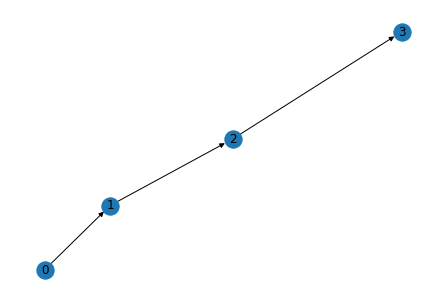

In [2]:
nodes = [0, 1, 2, 3]
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from((zip(nodes, nodes[1:])))
nx.draw(G, with_labels=True)

## Adjacency matrix
Matrix $A$ associated to a graph with $n$ nodes is a square matrix ($n\times n$) such that $A_{ij} = 1$ if there is an edge between $i$ and $j$. 

- Correspondence between matrix powers and paths.

In [3]:
A = nx.to_numpy_array(G)
A

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [4]:
np.linalg.matrix_power(A, 3)

array([[0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Example: Social networks

- Matrix powers are "friends of friends"
- Can be helpful for visualization

In [5]:
from utils import load_university_social_network, load_amazon_reviews

In [6]:
G_social = load_university_social_network()

In [7]:
len(G_social)

217

In [8]:
A_social = nx.to_numpy_array(G_social)
A_social

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

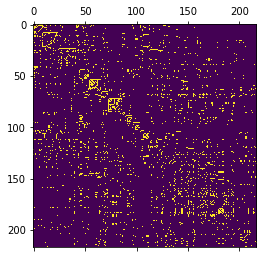

In [9]:
plt.matshow(A_social)

## Bipartite Graph Matrices

- Nodes are of two types (a partition).
- Edges only between nodes of different type.

In [10]:
# 3 customers, 4 products (bi-adjacency matrix)
cp_mat = np.array([[0, 1, 0, 0], 
                  [1, 0, 1, 0], 
                  [1, 1, 1, 1]]
                 )

In [11]:
cp_mat

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 1, 1]])

In [12]:
# Projection to customers
c_mat = cp_mat @ cp_mat.T # @ is the matrix product
c_mat # Diagonal: order/degree of the node, (i,j) is the number of common products between i and j

array([[1, 0, 1],
       [0, 2, 2],
       [1, 2, 4]])

## Example: Recommendation system using bipartite graph and bi-adjacency matrix

In [13]:
G_amazon = load_amazon_reviews()

100%|██████████| 64706/64706 [00:00<00:00, 446293.10it/s]


In [14]:
nx.is_bipartite(G_amazon)

True

In [15]:
def get_partition_nodes(G, partition):
    '''
    Returns nodes from a partition
    '''
    return [n for n, d in G.nodes(data=True) if d['bipartite'] == partition]

In [16]:
customer_nodes = get_partition_nodes(G_amazon, 'customer')
mat = nx.bipartite.biadjacency_matrix(G_amazon, customer_nodes)

In [17]:
customer_mat = mat @ mat.T # Matrix corresponding to projected weighted graph (# products in common bought) 

In [18]:
customer_mat

<5541x5541 sparse matrix of type '<class 'numpy.longlong'>'
	with 1894601 stored elements in Compressed Sparse Row format>

In [19]:
customer_mat.diagonal()[0:100]

array([ 91,  16,  13,   6,   8,  80,  34,  50,   5,  33,   8,  14,  43,
        73,   6,  12,  21, 155,  58,  10,   5,   7,  27,  14,  11, 200,
        47,  12,  11,  14,  30,  13,   9,  14,   6,   5,  18,  46,  16,
         8,  74,   8,   5,   5,  33,  11,  29,  36,   7,   5,   6,  18,
        63,   5,  39,  14,  30,  43,   6,  13,  97,  26,  21,   6,  49,
         8,  34,  20,  18,  35,  52,  25,  15,  48,  39,  20,  95, 301,
         5,  14,  45,  24,   7,   9,  17,   7, 375,  96, 144,   7,   7,
        61,   5,   5,  31,   6,  19, 112,  29,  17], dtype=int64)

## Customer similarity

We will see if customers are similar, based on the reviews shared.

1. Construct a sparse matrix with only diagonal elements (# of reviews in total)
2. Remove this from `customer_mat`
3. Get the indices where the weight is higher.

In [22]:
import scipy.sparse as sp

In [23]:
# Type conversion from numpy to scipy
degrees = customer_mat.diagonal()
customer_diags = sp.diags(degrees)

In [24]:
# Substract diagonal from customer_mat
off_diag = customer_mat - customer_diags

In [25]:
np.argmax(off_diag) # Maximum similarity between customers 

1629140

In [27]:
c1, c2 = np.unravel_index(np.argmax(off_diag), customer_mat.shape) # Customers with maximum similarity

In [28]:
customer_nodes[c1]

'A9Q28YTLYREO7'

In [29]:
customer_nodes[c2]

'A3HU0B9XUEVHIM'

In [31]:
mat[c1,:]-mat[c2,:] # All non-zero elements correspond to products that could be recommended

<1x3568 sparse matrix of type '<class 'numpy.longlong'>'
	with 645 stored elements in Compressed Sparse Row format>

In [32]:
customer_nodes[0]

'A3EBHHCZO6V2A4'

In [34]:
c = customer_nodes[0]  # Some random consumer

In [36]:
np.argmax(off_diag[0,:])

949

In [37]:
mat[0,:]-mat[949,:]

<1x3568 sparse matrix of type '<class 'numpy.longlong'>'
	with 204 stored elements in Compressed Sparse Row format>